In [15]:
# loading packages for JSONstat and data handling
#install.packages('rjstat')
#install.packages('reshape2')
library(rjstat)
library(tidyr)
library(tidyverse)
library(ggplot2)
library(reshape2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [9]:
# URL base
url_base <- "https://sampo.thl.fi/pivot/prod/fi/epirapo/covid19case/fact_epirapo_covid19case.json"

# request endpoint
request <- "?row=hcdmunicipality2020-445222&column=dateweek20200101-508804L&filter=measure-444833"

# concatenating url
url <- paste0(url_base, request)

# fetching the data from API
cube <- fromJSONstat(url, naming = "label", use_factors = F, silent = T)

# data from the cube to its own object
res <- cube[[1]]

# renaming the data columns
names(res)[names(res) == 'dateweek20200101'] <- 'Date'
names(res)[names(res) == 'hcdmunicipality2020'] <- 'Municipality'
names(res)[names(res) == 'value'] = 'Cases'

# reformatting data
class(res$Cases) = "double"
res[['Date']] = as.Date(res[['Date']])

# replacing na with zeros 
res[is.na(res)] = 0

# pivoting municipality-column values to new columns
res_fin = res %>% pivot_wider(
  names_from = Municipality, 
  values_from = Cases,
  values_fill = 0
)

# setting Date as index
head(res_fin, 20)

Date,Ahvenanmaa,Varsinais-Suomen SHP,Satakunnan SHP,Kanta-Hämeen SHP,Pirkanmaan SHP,Päijät-Hämeen SHP,Kymenlaakson SHP,Etelä-Karjalan SHP,Etelä-Savon SHP,⋯,Keski-Suomen SHP,Etelä-Pohjanmaan SHP,Vaasan SHP,Keski-Pohjanmaan SHP,Pohjois-Pohjanmaan SHP,Kainuun SHP,Länsi-Pohjan SHP,Lapin SHP,Helsingin ja Uudenmaan SHP,Kaikki Alueet
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-01-01,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-06,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-07,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-08,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-09,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



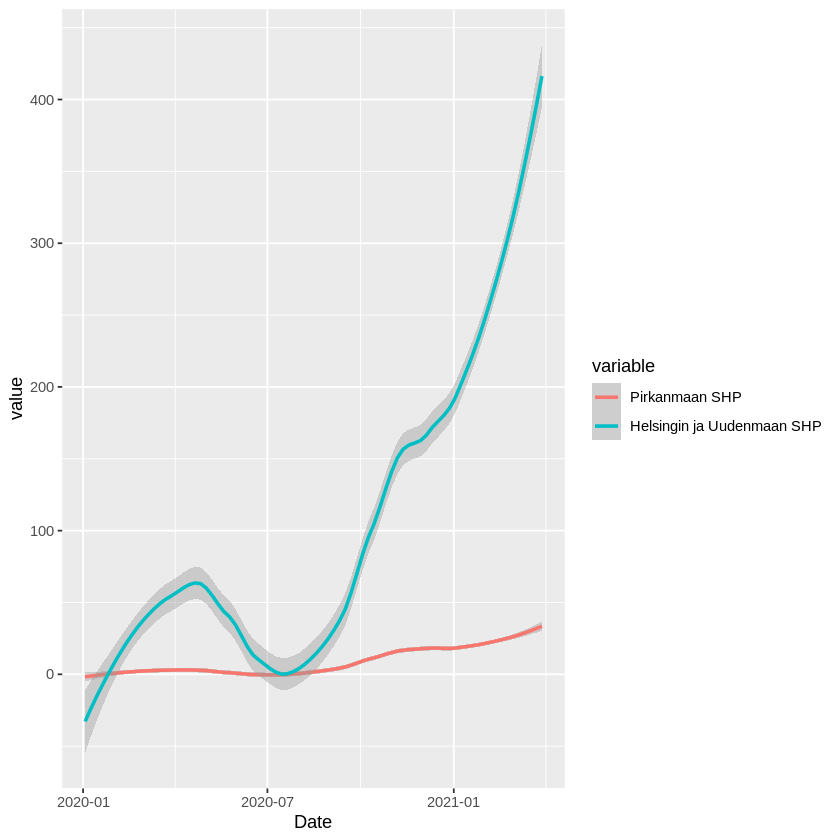

In [24]:
filtered_data = res_fin %>%
  select('Date', 'Pirkanmaan SHP', 'Helsingin ja Uudenmaan SHP') %>%
  filter(Date >= as.Date("2020-01-03") & Date <= as.Date('2021-03-29'))

d = melt(filtered_data, id.vars='Date')

# Everything on the same plot
ggplot(d, aes(Date,value, col=variable)) +  
  stat_smooth(span = 0.5) 
